## Importação dos pacotes

In [21]:
# importar pacotes necessários
import numpy as np
import pandas as pd

In [22]:
# definir parâmetros extras
pd.set_option('precision', 4)
pd.set_option('display.max_columns', 100)

## Carga dos dados

In [23]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='datetime', parse_dates=['datetime'])

# mostrar alguns exemplos de registros
data.head()

,temperature
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,10.8800
2012-10-01 14:00:00,10.9198
2012-10-01 15:00:00,11.0240
2012-10-01 16:00:00,11.1281


In [24]:
# quantas linhas e colunas existem?
data.shape

(36202, 1)

## Análise dos dados

In [25]:
# quais são as colunas e respectivos tipos de dados?
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36202 entries, 2012-10-01 12:00:00 to 2016-11-17 21:00:00
Data columns (total 1 columns):
temperature    36201 non-null float64
dtypes: float64(1)
memory usage: 565.7 KB


In [26]:
# existem colunas com dados nulos?
data[data.columns[data.isnull().any()]].isnull().sum()

temperature    1
dtype: int64

In [27]:
# sumário estatístico das características numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,36201.0,9.6287,11.2093,-29.6667,1.23,10.31,19.05,34.9


In [28]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
numeric_feats

Index(['temperature'], dtype='object')

In [29]:
data.head(10).T

datetime,2012-10-01 12:00:00,2012-10-01 13:00:00,2012-10-01 14:00:00,2012-10-01 15:00:00,2012-10-01 16:00:00,2012-10-01 17:00:00,2012-10-01 18:00:00,2012-10-01 19:00:00,2012-10-01 20:00:00,2012-10-01 21:00:00
temperature,NaN,10.88,10.9198,11.024,11.1281,11.2323,11.3365,11.4407,11.5448,11.649


In [30]:
data.isna().sum()

temperature    1
dtype: int64

In [31]:
periodo = '7D' # semanal
minimas = data.resample(periodo).min()
maximas = data.resample(periodo).max()
medias = data.resample(periodo).mean()
desvios = data.resample(periodo).std()

minimas.rename(columns={'temperature': 'minima'}, inplace=True)
maximas.rename(columns={'temperature': 'maxima'}, inplace=True)
medias.rename(columns={'temperature': 'media'}, inplace=True)
desvios.rename(columns={'temperature': 'desvio'}, inplace=True)

In [32]:
medias.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2012-10-01 12:00:00 to 2016-11-14 12:00:00
Data columns (total 1 columns):
media    216 non-null float64
dtypes: float64(1)
memory usage: 3.4 KB


In [43]:
temperaturas = minimas.merge(maximas, on='datetime').merge(medias, on='datetime').merge(desvios, on='datetime')

In [44]:
temperaturas['media-dp'] = temperaturas.media - temperaturas.desvio
temperaturas['media+dp'] = temperaturas.media + temperaturas.desvio

In [45]:
temperaturas.head(10).T

datetime,2012-10-01 12:00:00,2012-10-08 12:00:00,2012-10-15 12:00:00,2012-10-22 12:00:00,2012-10-29 12:00:00,2012-11-05 12:00:00,2012-11-12 12:00:00,2012-11-19 12:00:00,2012-11-26 12:00:00,2012-12-03 12:00:00
minima,4.7700,1.8300,4.8700,5.0100,-0.3900,-1.3100,-3.6800,-1.7700,-2.9900,-1.6400
maxima,23.7600,17.5200,21.4100,24.3200,8.7000,15.0100,19.4800,15.7700,12.6300,15.6000
media,14.0428,8.9033,12.2102,14.0125,5.1562,5.1363,5.0501,6.0845,2.8684,6.2292
desvio,4.3629,4.2700,3.8267,5.2697,1.7328,3.9908,5.3439,4.4985,3.4634,4.7816
media-dp,9.6798,4.6333,8.3835,8.7428,3.4234,1.1455,-0.2938,1.5861,-0.5950,1.4476
media+dp,18.4057,13.1733,16.0369,19.2822,6.8890,9.1272,10.3940,10.5830,6.3318,11.0107


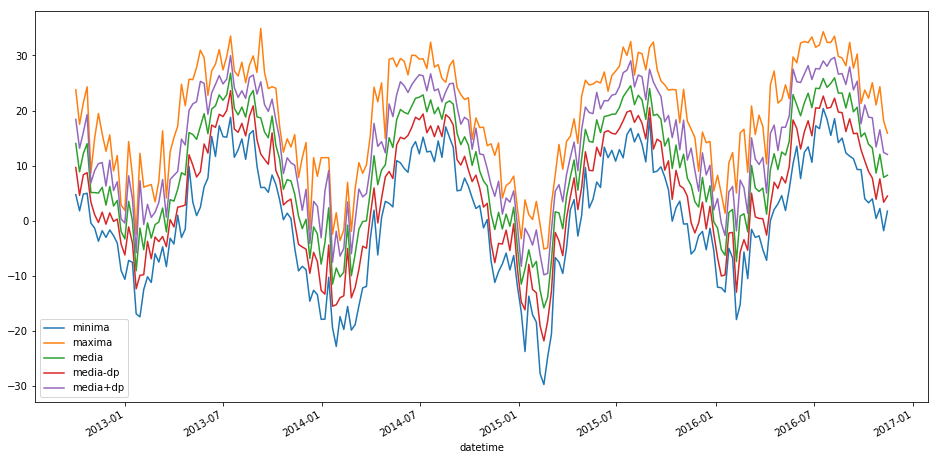

In [49]:
temperaturas.drop(['desvio'], axis=1).plot(figsize=(16,8))
#temperaturas[['media', 'media-dp', 'media+dp']].plot(figsize=(16,8))

In [50]:
data[(data.index.hour >= 9) & (data.index.hour <= 17)].head(5)

,temperature
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,10.8800
2012-10-01 14:00:00,10.9198
2012-10-01 15:00:00,11.0240
2012-10-01 16:00:00,11.1281


In [51]:
data[(data.index.hour >= 9) & (data.index.hour <= 17)].resample('D').mean().head(5)

,temperature
datetime,
2012-10-01,11.0368
2012-10-02,14.3353
2012-10-03,14.5078
2012-10-04,16.8044
2012-10-05,16.9272
